In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

def integrate (wavelength, intensity, Index):
    sum = 0
    for i in Index:
        sum += intensity[i]*(wavelength[i+1]-wavelength[i])
    return sum


siv97 = []
for i in [3,6,9,12,15,18]:
    siv97.append(pd.read_csv('97-m3-'+ str(i) + '-siv-60s' + '.csv'))
for i in [3,6,9]:
    siv97.append(pd.read_csv('97-m9-'+ str(i) + '-siv-60s' + '.csv'))

siv98 = []
for i in [3,6,9,12,15,18]:
    siv98.append(pd.read_csv('98-m3-'+ str(i) + '-siv-60s' + '.csv'))

nv98 = []
for i in [3,6,9,12,15,18]:
    nv98.append(pd.read_csv('98-m3-'+ str(i) + '-nv-60s' + '.csv'))

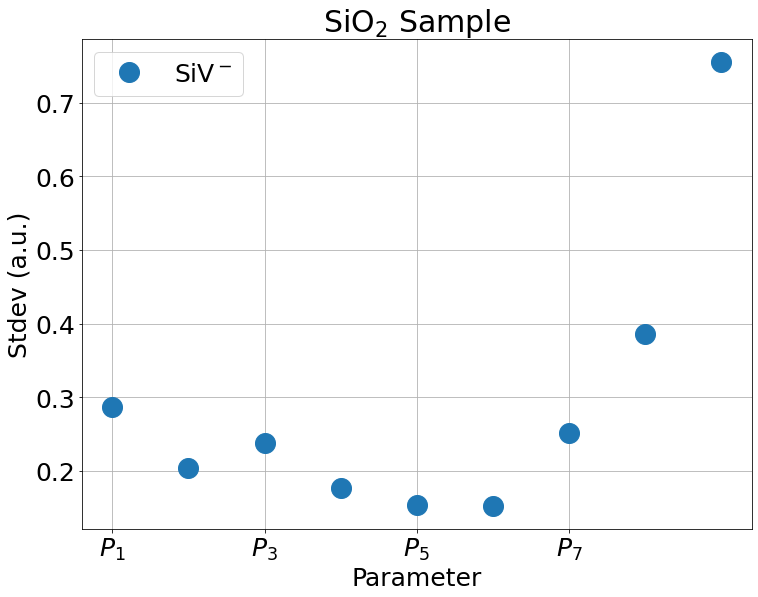

In [5]:
stdSiv97 = []
for siv in siv97:
    stdSiv97.append(np.std(siv['I'][166:1181]/(integrate(siv['W'],(siv['I']-siv['I'][166]), list(range(166,1181))))))

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel('Parameter')
plt.ylabel('Stdev (a.u.)')
# plt.ylim(0,0.20)
plt.title('SiO$_2$ Sample')
plt.xticks([0,2,4,6], ('$P_1$','$P_3$','$P_5$','$P_7$'))

plt.plot(stdSiv97, 'o', markersize = '20', label = 'SiV$^-$')
plt.legend()

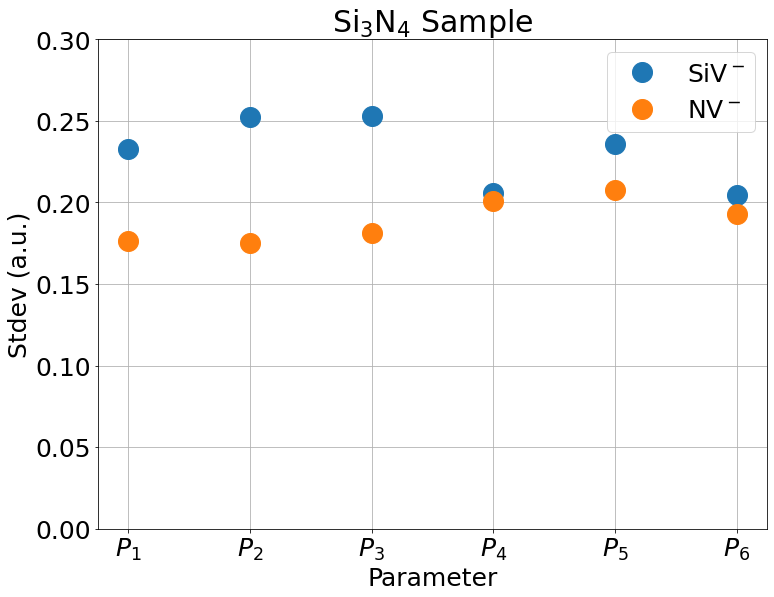

In [8]:
stdNv98 = []
for nv in nv98:
    stdNv98.append(np.std(nv['I'][220:1124]/(integrate(nv['W'],(nv['I']-nv['I'][166]), list(range(166,1181))))))
stdSiv98 = []
for siv in siv98:
    stdSiv98.append(np.std(siv['I'][166:1181]/(integrate(siv['W'],(siv['I']-siv['I'][166]), list(range(166,1181))))))

plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel('Parameter')
plt.ylabel('Stdev (a.u.)')
plt.ylim(0,0.3)
plt.plot(stdSiv98,'o', markersize = '20',label = 'SiV$^-$')
plt.plot(stdNv98,'o', markersize = '20',label = 'NV$^-$')

plt.xticks([0,1,2,3,4,5], ('$P_1$','$P_2$','$P_3$','$P_4$','$P_5$','$P_6$'))

plt.title('Si$_3$N$_4$ Sample')


# plt.plot(stdSiv97, 'o', label = 'SiV-')
plt.legend()